In [64]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math

# 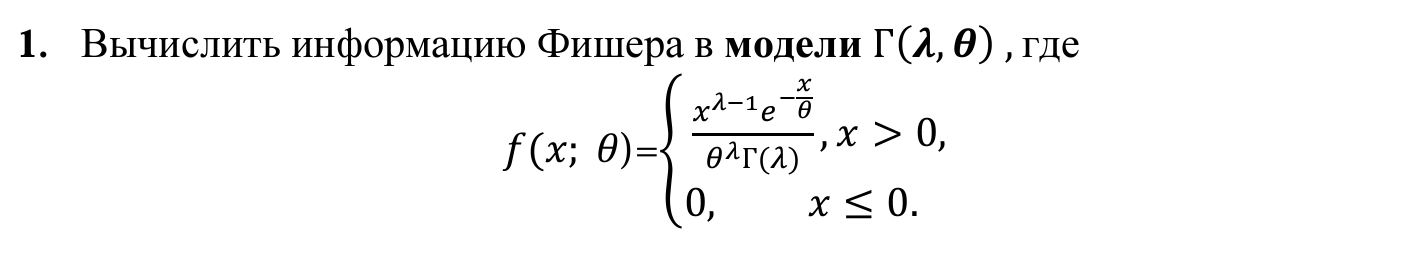

In [65]:
# Определение переменных и плотности f(x; λ, θ)
x, l, t = symbols('x lambda theta', real=True, positive=True)
f = x**(l - 1) * exp(-x / t) / (t**l * gamma(l))

# Вычисление логарифма плотности
log_f = log(f)

# Первая производная логарифма по θ
d_log_f_theta = diff(log_f, t)

# Вторая производная логарифма по θ
d2_log_f_theta = diff(d_log_f_theta, t)

# Интеграл квадрата первой производной (информация Фишера)
info_fisher_theta = integrate(-d2_log_f_theta * f, (x, 0, float('inf')))
info_fisher_theta.simplify()

lambda/theta**2

# 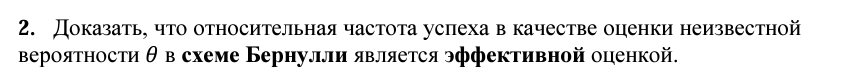

Для доказательства эффективности оценки, нужно показать, что относительная частота успехов $ \hat{\theta} = \frac{X}{n} $ в схеме Бернулли является несмещённой оценкой $ \theta $ и достигает нижней границы Крамера-Рао.

### Схема Бернулли
В схеме Бернулли наблюдается $ n $ независимых испытаний, каждое из которых имеет два исхода: успех с вероятностью $ \theta $ и неудача с вероятностью $ 1 - \theta $. Вероятность успеха в $ X $ из $ n $ испытаний задаётся биномиальным распределением:
$$
P(X = x) = \binom{n}{x} \theta^x (1 - \theta)^{n-x},\\

где~~  X \sim \text{Bin}(n, \theta) 
$$

Относительная частота успехов:
$$
\hat{\theta} = \frac{X}{n}.
$$

### 1. Несмещённость оценки
Для несмещённости необходимо показать, что математическое ожидание $ \hat{\theta} $ равно $ \theta $:
$$
\mathbb{E}[\hat{\theta}] = \mathbb{E}\left[\frac{X}{n}\right] = \frac{1}{n} \mathbb{E}[X].
$$
Для биномиального распределения:
$$
\mathbb{E}[X] = n\theta.
$$
Следовательно:
$$
\mathbb{E}[\hat{\theta}] = \frac{1}{n} \cdot n\theta = \theta.
$$
Таким образом, $ \hat{\theta} $ является несмещённой оценкой.

---

### 2. Информация Фишера
Функция правдоподобия для биномиального распределения:

In [66]:
n, x, t = symbols('n x theta', real=True, positive=True)

C = factorial(n)/(factorial(n-x)*factorial(x))

L = C*t**x*(1-t)**(n-x)
L

theta**x*(1 - theta)**(n - x)*factorial(n)/(factorial(x)*factorial(n - x))

Логарифм правдоподобия:

In [67]:
log_L = log(L)
log_L.expand()

x*log(theta) + log((1 - theta)**(n - x)*factorial(n)/(factorial(x)*factorial(n - x)))

Первая производная:

In [68]:
d_log_L_theta = diff(log_L,t)
d_log_L_theta.simplify()

(n*theta - x)/(theta**2 - theta)

Вторая производная:

In [69]:
d2_log_L_theta = diff(d_log_L_theta.simplify(),t)
d2_log_L_theta = combsimp(d2_log_L_theta)
d2_log_L_theta

(-n*theta**2 + 2*theta*x - x)/(theta**2*(theta - 1)**2)

Ожидание второй производной (информация Фишера):

Так как $\mathbb{E}[X] = n\theta$

In [70]:
info_fisher_theta = -d2_log_L_theta.subs({x:n*t}) 
info_fisher_theta= info_fisher_theta.simplify()
info_fisher_theta

-n/(theta*(theta - 1))

### 3. Достижение границы Крамера-Рао
Дисперсия оценки $ \hat{\theta} $:
$$
\text{Var}(\hat{\theta}) = \text{Var}\left(\frac{X}{n}\right) = \frac{1}{n^2} \text{Var}(X).
$$
Для биномиального распределения:
$$
\text{Var}(X) = n\theta(1-\theta).
$$
Следовательно:
$$
\text{Var}(\hat{\theta}) = \frac{1}{n^2} \cdot n\theta(1-\theta) = \frac{\theta(1-\theta)}{n}.
$$

Граница Крамера-Рао:

In [71]:
var_theta_hat = t*(1-t)/n 
var_theta_hat

theta*(1 - theta)/n

Проверка равенства:

In [72]:
delta = 1/info_fisher_theta
delta

-theta*(theta - 1)/n

In [73]:
(var_theta_hat/delta).simplify()

1

Так как дисперсия оценки $ \hat{\theta} $ равна границе Крамера-Рао, $ \hat{\theta} $ является эффективной оценкой.

# 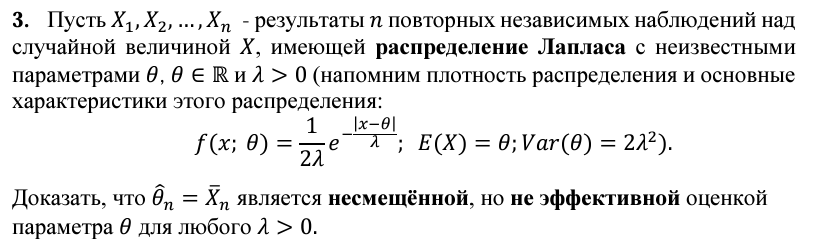

In [74]:
l, x, t = symbols('lambda x theta', real=True, positive=True)

### Распределение Лапласа

$$
X_1\dots X_n; X_i\sim \mathcal{Laplas}(\theta, \lambda)\\~\\
\mathbb{E}(X) = \theta\\
\mathbb{Var}(\theta) = 2\lambda^2
$$

### Оценка
$$
\hat{\theta}_n = \overline{X}_n.
$$

### 1. Несмещённость оценки
Для несмещённости необходимо показать, что математическое ожидание $ \hat{\theta} $ равно $ \theta $:
$$
\mathbb{E}[\hat{\theta}_n] = \mathbb{E}[\overline{X}_n] = \mathbb{E}[X] = \theta.
$$

Таким образом, $ \hat{\theta} $ является несмещённой оценкой.

---

### 2. Эффективность оценки
Для проверки границ Рао-Крамера нужно найти дисперсию по $\hat{\theta}_n$:
$$
\mathbb{Var}(\hat{\theta}_n) = \mathbb{Var}(\overline{X}_n) = \frac{\mathbb{Var}(X)}{n} = \frac{2\lambda^2}{n}
$$
Для распределения Лапласа с плотностью $ f(x; \theta) = \frac{1}{2\lambda} e^{-\frac{|x - \theta|}{\lambda}} $ информация Фишера равна:

In [75]:
f = exp(-Abs(x-t)/l)/(2*l)
i_theta_fisher  = simplify(diff(log(f),t)**2)
i_theta_fisher = i_theta_fisher.args[1][0]
i_theta_fisher

lambda**(-2)

$$
I(\theta) = \mathbb{E}\left[\left(\frac{\partial \ln f(x; \theta)}{\partial \theta}\right)^2\right] = \frac{1}{\lambda^2}.
$$

In [76]:
delta = 1/ (n*i_theta_fisher)


In [77]:
var_theta_hat = 2*l**2/n
(var_theta_hat/delta).simplify()

2

Так как дисперсия оценки $ \hat{\theta}_n $ превышает нижнюю границу Крамера-Рао, она не достигает этой границы и, следовательно, не является эффективной.

---

### 3. Вывод
1. $ \hat{\theta}_n = \bar{X}_n $ является **несмещённой оценкой** параметра $ \theta $, так как $ \mathbb{E}[\hat{\theta}_n] = \theta $.
2. $ \hat{\theta}_n $ **не является эффективной**, так как её дисперсия $ \text{Var}(\hat{\theta}_n) = \frac{2\lambda^2}{n} $ превышает нижнюю границу Рао-Крамера $ \frac{\lambda^2}{n} $.

# 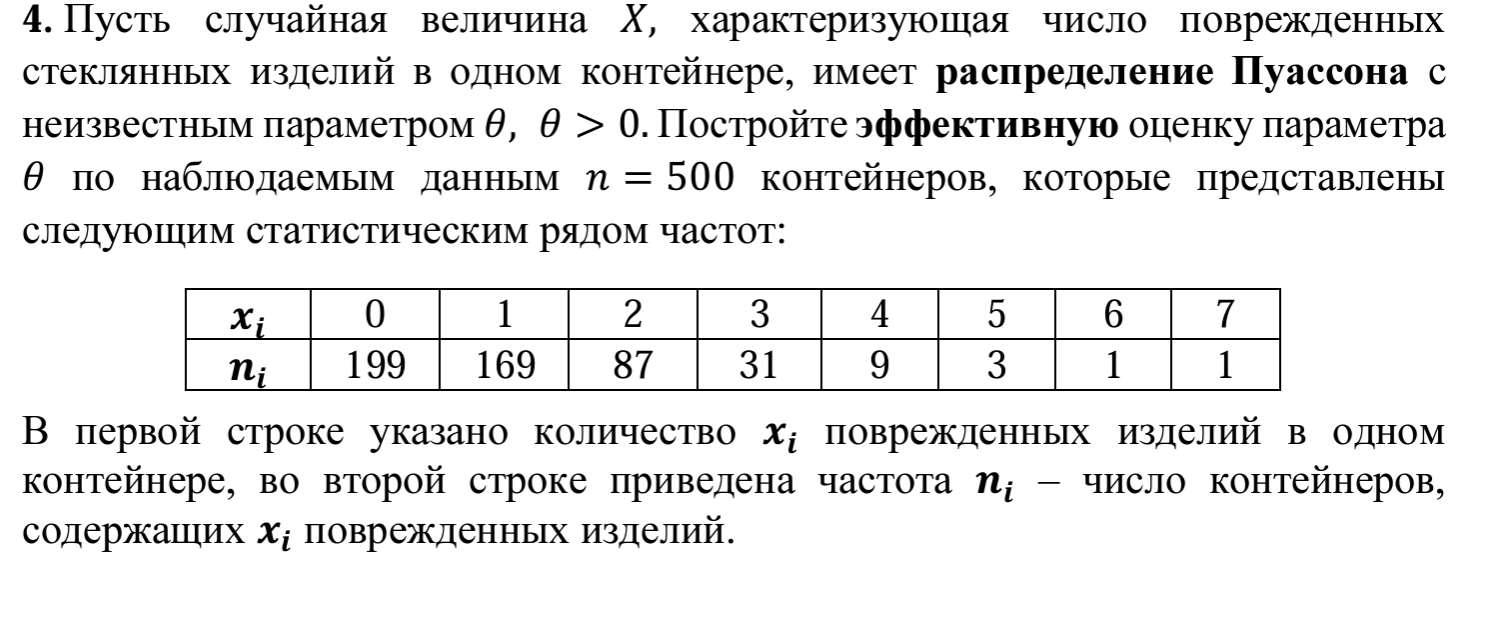

$$
X \sim \mathcal{Poisson}(\theta)\\
\mathbb{E}(X) = \mathbb{Var}(X) = \theta
$$

In [85]:
xi = np.arange(8)
ni = np.array('199 169 87 31 9 3 1 1'.split(' ')).astype(int)

N = ni.sum()

pi = ni/N

f = t**x/factorial(x) *exp(-t)
f = f**n

log_f = f
d_log_f = diff(log_f,t)


L = 1
for i in np.stack((xi,ni)).T:
    L*=f.subs({x:i[0],n:i[1]})

d_log_l = simplify(diff(log(L),t))

display(Math(r'\hat{\theta} = ' + latex(solve(d_log_l)[0])))

<IPython.core.display.Math object>